<a href="https://colab.research.google.com/github/0308priya/machine-learning-lab/blob/main/Random_Forest_%26_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Random Forest**

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')




Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/machine learning1/archive (1)/customer_churn_dataset-training-master.csv')
df

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.00,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.00,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.00,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.00,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440828,449995.0,42.0,Male,54.0,15.0,1.0,3.0,Premium,Annual,716.38,8.0,0.0
440829,449996.0,25.0,Female,8.0,13.0,1.0,20.0,Premium,Annual,745.38,2.0,0.0
440830,449997.0,26.0,Male,35.0,27.0,1.0,5.0,Standard,Quarterly,977.31,9.0,0.0
440831,449998.0,28.0,Male,55.0,14.0,2.0,0.0,Standard,Quarterly,602.55,2.0,0.0


In [ ]:
print ("Dataset row & col",df.shape)

Dataset row & col (440833, 12)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB
None


In [ ]:
df.isnull().sum()

,0
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1
Last Interaction,1


In [ ]:
# drop customerID
df.drop('CustomerID',axis=1,inplace=True)

KeyError: "['CustomerID'] not found in axis"

In [ ]:
# drop the null values from label col Churn
df.dropna(subset=['Churn'],inplace=True)
df.shape


(440832, 11)

In [ ]:
from sklearn.preprocessing import LabelEncoder


# Convert 'Churn' to int
df['Churn'] = df['Churn'].astype(int)

# Encode categorical columns
cat_cols = ['Gender', 'Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [ ]:
# Split features and target
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
#Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=10,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

In [ ]:
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [ ]:
#Evaluation with Full Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

In [ ]:
# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)


In [ ]:
# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

In [ ]:
# Print results
print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (PPV):        {precision:.5f}")
print(f"Recall (Sensitivity):   {recall:.5f}")
print(f"F1 Score:               {f1:.5f}")
print(f"ROC AUC:                {roc_auc:.5f}")
print(f"Specificity (TNR):      {specificity:.5f}")
print(f"False Positive Rate:    {fpr:.5f}")
print(f"False Negative Rate:    {fnr:.5f}")
print(f"Balanced Accuracy:      {balanced_acc:.5f}")
print(f"Matthews Corr Coef:     {mcc:.5f}")



Accuracy:              0.99968
Precision (PPV):        0.99994
Recall (Sensitivity):   0.99950
F1 Score:               0.99972
ROC AUC:                0.99995
Specificity (TNR):      0.99992
False Positive Rate:    0.00008
False Negative Rate:    0.00050
Balanced Accuracy:      0.99971
Matthews Corr Coef:     0.99935


In [ ]:
#Confusion Matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


In [ ]:
# Title
title = "Confusion Matrix - Random Forest"
# Get class labels
labels = sorted(y_test.unique())  # or ['No', 'Yes'] if binary


In [ ]:
# Set style
plt.rcParams.update({
    'font.size': 18,
    'font.family': 'serif',
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18
})

In [ ]:
# Get confusion matrix
cm = confusion_matrix(y_test, y_pred)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

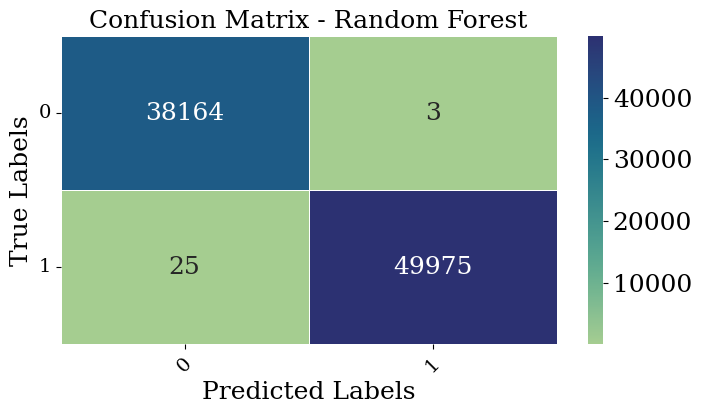

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(8, 4))
cmap = sns.color_palette("crest", as_cmap=True)

sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 18}, linewidths=0.5, linecolor='white')

ax.set_title(title)
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(labels, rotation=45, fontsize=14)
ax.set_yticklabels(labels, rotation=0, fontsize=14)


In [ ]:
# Inner gridlines
ax.hlines([1], *ax.get_xlim(), colors='white', linewidth=4)
ax.vlines([1], *ax.get_ylim(), colors='white', linewidth=4)

plt.tight_layout()
plt.show()


<Figure size 640x480 with 0 Axes>

# **KNN Clasification**

In [ ]:
le_new = LabelEncoder()

In [ ]:
df_ohe = df.copy()
df_ohe

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0


In [ ]:
#Dataset split into X and y
X= df_ohe.drop('Churn',axis=1)
y= df_ohe['Churn']

In [ ]:
columns = ['Gender', 'Subscription Type', 'Contract Length']
for col in columns:
  X[col] = le_new.fit_transform(X[col])
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0


In [ ]:
X.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

In [ ]:
# One hot Encoding
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

ohe = OneHotEncoder()
ct = ColumnTransformer([('Gender', OneHotEncoder(), [1])], remainder='passthrough')

In [ ]:
X = ct.fit_transform(X)
X

array([[  1.  ,   0.  ,  30.  , ...,   0.  , 932.  ,  17.  ],
       [  1.  ,   0.  ,  65.  , ...,   1.  , 557.  ,   6.  ],
       [  1.  ,   0.  ,  55.  , ...,   2.  , 185.  ,   3.  ],
       ...,
       [  0.  ,   1.  ,  26.  , ...,   2.  , 977.31,   9.  ],
       [  0.  ,   1.  ,  28.  , ...,   2.  , 602.55,   2.  ],
       [  0.  ,   1.  ,  31.  , ...,   2.  , 567.77,  21.  ]])

In [ ]:
y = y.values

# **Data Splits**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(352665, 11)
(88167, 11)
(352665,)
(88167,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=593)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=593)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score,
    matthews_corrcoef
)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
balanced_acc = balanced_accuracy_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

In [ ]:
print(f"\nAccuracy:              {accuracy:.5f}")
print(f"Precision (PPV):        {precision:.5f}")
print(f"Recall (Sensitivity):   {recall:.5f}")
print(f"F1 Score:               {f1:.5f}")
print(f"ROC AUC:                {roc_auc:.5f}")
print(f"Balanced Accuracy:      {balanced_acc:.5f}")
print(f"Matthews Corr Coef:     {mcc:.5f}")


Accuracy:              0.82254
Precision (PPV):        0.99634
Recall (Sensitivity):   0.69026
F1 Score:               0.81553
ROC AUC:                0.84346
Balanced Accuracy:      0.84346
Matthews Corr Coef:     0.69641
